

<h1><center>Neural Network with Keras</center></h1>


<h4>About this Notebook</h4>
In this notebook, we learn how to use tensorflow library with Keras to implement a neural network model. We open a csv dataset that is related to fuel consumption and Carbon dioxide emission of cars and import that dataset to Python. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict carbon dioxide emission tax. A carbon tax will be imposed if the carbon dioxide emission is higher than 300.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding_data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the data in</a></li>
        <li><a href="#data_exploration">Data Exploration</a></li>
        <li><a href="#neural_network">Building the Neural Network</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
    </ol>
</div>
<br>
<hr>

### Importing Needed packages

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [63]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

scipy: 1.10.1
numpy: 1.24.2
matplotlib: 3.7.1
pandas: 1.5.3
statsmodels: 0.13.5
sklearn: 1.2.2


In [64]:
# !pip install tensorflow

In [65]:
# !pip install Keras

In [66]:
# tensorflow

# import tensorflow
# print('tensorflow: %s' % tensorflow.__version__)

In [67]:
# keras
# import keras
# print('keras: %s' % keras.__version__)

In [68]:
# from tensorflow import keras
# from keras.layers import Dense
# from keras.models import Sequential


In [69]:
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have loaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>

In [70]:
df = pd.read_csv('FuelConsumption.csv')
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [71]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Lets select some features to explore more.

In [72]:
cdf = df[['ENGINESIZE','CYLINDERS','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,CO2EMISSIONS
0,2.0,4,196
1,2.4,4,221
2,1.5,4,136
3,3.5,6,255
4,3.5,6,244
5,3.5,6,230
6,3.5,6,232
7,3.7,6,255
8,3.7,6,267


The customer is required to pay Carbox Tax if Carbondioxide Emission is higher than 300. Now let's define an indicator for Carbon Tax:

In [73]:
ct=df.CO2EMISSIONS>300
ct.head(9)


0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
Name: CO2EMISSIONS, dtype: bool

<h2 id="neural_network">Building the Neural Network</h2>


#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [74]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Create the Carbon Tax indicator for train and test data

In [75]:
# define the Carbon Tax for the training set
ct_train=train.CO2EMISSIONS>300
X_train=np.asanyarray(train[['ENGINESIZE','CYLINDERS']])

# define the Carbon Tax for the testing set
ct_test=test.CO2EMISSIONS>300
X_test=np.asanyarray(test[['ENGINESIZE','CYLINDERS']])

<h2 id="Building the Neural Network">Neural Network with Keras</h2>


#### Define Keras Model

Models in Keras are defined as a sequence of layers.

We create a Sequential model and add layers one at a time until we are happy with our network architecture.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the imput_dim argument and setting it to 2 for the 2 input variables.

In this example, we will use a fully-connected network structure with four layers.

Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

We will use the rectified linear unit activation function referred to as ReLU on the first several layers and the Sigmoid function in the output layer.

It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. These days, better performance is achieved using the ReLU activation function. We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

We can piece it all together by adding each layer:

The model expects rows of data with 2 variables (the input_dim=2 argument).
The first hidden layer has 2 nodes and uses the relu activation function.
The output layer has one node and uses the sigmoid activation function.


In [76]:
# define the keras model
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


#### Compile Keras Model

When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“. 

We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems. 

Finally, because it is a classification problem, we will collect and report the classification accuracy, defined via the metrics argument.


In [77]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Fit Keras Model:

The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.

These configurations can be chosen experimentally by trial and error. We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. This is called model convergence.

In [78]:
# fit the keras model on the dataset
model.fit(X_train, ct_train, epochs=150, batch_size=10)

Train on 864 samples
Epoch 1/150
864/864 [==============================] - 0s 95us/sample - loss: 0.6834 - accuracy: 0.7674
Epoch 2/150
864/864 [==============================] - 0s 47us/sample - loss: 0.6649 - accuracy: 0.7674
Epoch 3/150
864/864 [==============================] - 0s 48us/sample - loss: 0.6483 - accuracy: 0.7674
Epoch 4/150
864/864 [==============================] - 0s 47us/sample - loss: 0.6338 - accuracy: 0.7674
Epoch 5/150
864/864 [==============================] - 0s 49us/sample - loss: 0.6211 - accuracy: 0.7674
Epoch 6/150
864/864 [==============================] - 0s 51us/sample - loss: 0.6098 - accuracy: 0.7674
Epoch 7/150
864/864 [==============================] - 0s 52us/sample - loss: 0.6001 - accuracy: 0.7674
Epoch 8/150
864/864 [==============================] - 0s 50us/sample - loss: 0.5915 - accuracy: 0.7674
Epoch 9/150
864/864 [==============================] - 0s 51us/sample - loss: 0.5840 - accuracy: 0.7674
Epoch 10/150
864/864 [=====================

<h2 id="evaluation">Evaluation</h2>


### Evaluate Keras Model
We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. 

You can also evaluate your model on your testing dataset using the evaluate() function on your model and pass it the input and output from the testing set.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. We are only interested in reporting the accuracy, so we will ignore the loss value.

In [79]:

# evaluate the keras model within the training set
_, accuracy = model.evaluate(X_train, ct_train)
print('Accuracy: %.2f' % (accuracy*100))


Accuracy: 76.74


D:\Users\Reaga\anaconda3\envs\tf1\lib\site-packages\tensorflow\python\keras\engine\training.py:2455: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [80]:

# evaluate the keras model with the testing set
_, accuracy = model.evaluate(X_test, ct_test)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 83.25


### Make Predictions


Making predictions is as easy as calling the predict() function on the model. We are using a sigmoid activation function on the output layer, so the predictions will be a probability in the range between 0 and 1. We can easily convert them into a crisp binary prediction for this classification task by rounding them using the predict_classes function.

In [81]:
# make class predictions with the model
predictions_train = model.predict_classes(X_train)
predictions_train

D:\Users\Reaga\anaconda3\envs\tf1\lib\site-packages\tensorflow\python\keras\engine\sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [82]:
# make class predictions with the model
predictions_test = model.predict_classes(X_test)
predictions_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [83]:
from sklearn.metrics import jaccard_score
jaccard_score(ct_test, predictions_test)

0.0

In [84]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(ct_test, predictions_test, labels=[1,0]))

[[  0  34]
 [  0 169]]


Confusion matrix, without normalization
[[  0  34]
 [  0 169]]


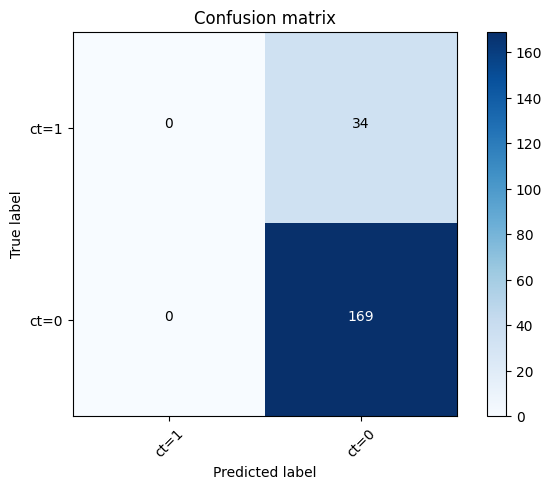

In [85]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(ct_test, predictions_test, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['ct=1','ct=0'],normalize= False,  title='Confusion matrix')

#### Practice
1. Rebuild the neural network with 10 neurons on the hidden layer. 
3. Rebuild the neural network with 3 hidden layers.

Note: model.predict_classes is deprecated for tensorflow versions after 2.6. Try the followings instead to predict the classes.

In [86]:
ct_prob=model.predict(X_test)
print(ct_prob)

[[0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]
 [0.23]


In [87]:
ct_predict_test=np.where(ct_prob > 0.5, 1,0)

In [88]:
jaccard_score(ct_test, ct_predict_test)

0.0

In [92]:
import tensorflow as tf

tf.__version__

AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)